In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

dataset_directory = "C:/Users/surpriseX/PycharmProjects/7275 project/Grape/color"

def load_images_and_labels(dataset_dir, image_size=(256, 256), subset_ratio=1.0):
    images = []
    labels = []
    for label in os.listdir(dataset_dir):
        class_folder = os.path.join(dataset_dir, label)
        if os.path.isdir(class_folder):
            image_files = os.listdir(class_folder)
            # Reduce the amount of data according to subset_ratio
            subset_size = int(len(image_files) * subset_ratio)
            for image_file in image_files[:subset_size]:
                image_path = os.path.join(class_folder, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                if image is not None:
                    if image.shape[:2] != image_size:
                        image = cv2.resize(image, image_size)
                    images.append(image)
                    labels.append(label)
    return np.array(images), np.array(labels)
  
# Normalization function
def normalize_images(images):
    images_normalized = images.astype('float32') / 255.0
    return images_normalized

# Load and preprocess data
images, labels = load_images_and_labels(dataset_directory)
images_normalized = normalize_images(images)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_normalized, labels, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

print(labels)

Training set size: (3249, 256, 256, 3)
Testing set size: (813, 256, 256, 3)
['0' '0' '0' ... '3' '3' '3']


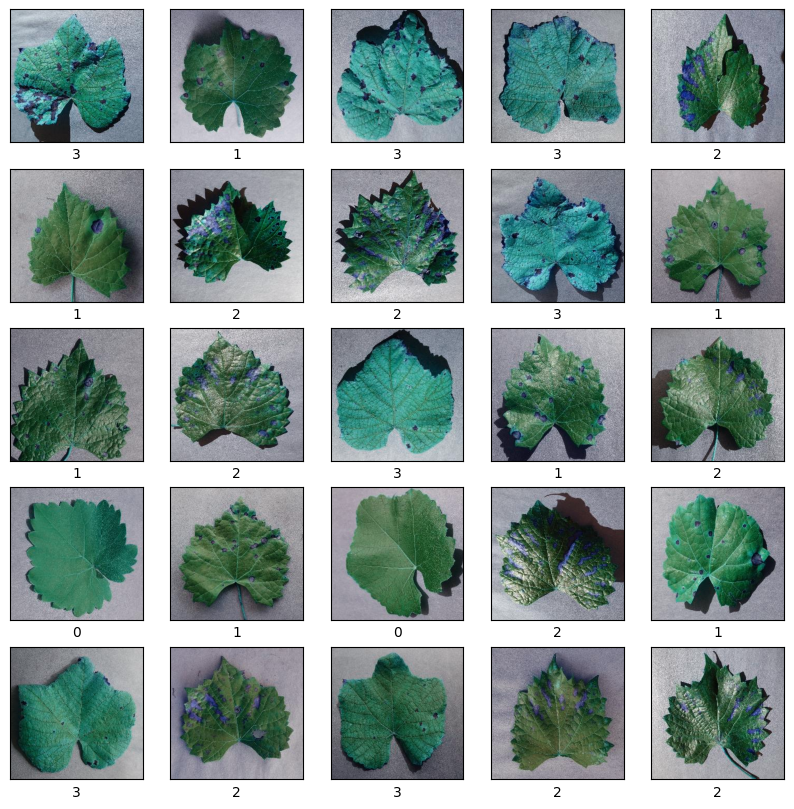

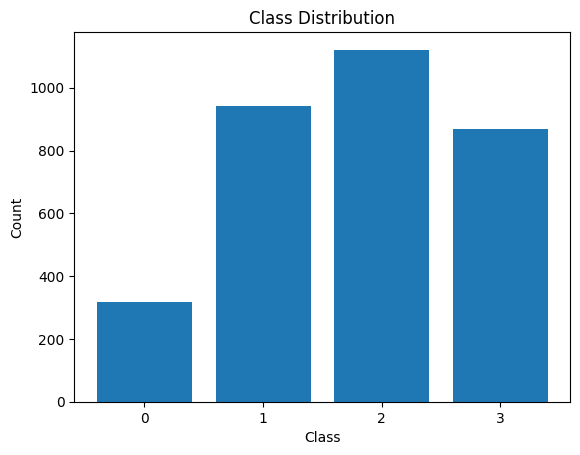

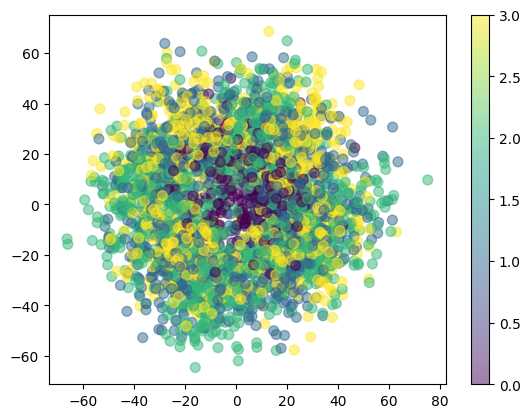

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Display some image samples
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

plot_images(X_train, y_train)

# Check class distribution
def plot_label_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts)
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

plot_label_distribution(y_train)

# Dimensionality reduction on images for visualization
def visualize_with_pca(X, labels):
    pca = PCA(n_components=2)
    result = pca.fit_transform(X.reshape(X.shape[0], -1)) # Flatten the images
    plt.scatter(result[:, 0], result[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.colorbar()
    plt.show()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

visualize_with_pca(X_train, y_train_encoded)

In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Flatten the image data for SVM and Decision Tree, since they do not take image data directly
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Encode the string class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the models with the default parameters
svm_model = SVC(gamma='scale')
dt_model = DecisionTreeClassifier()
nn_model = MLPClassifier(max_iter=1000)  # Increased max_iter for convergence

# Train and evaluate the SVM
print("Training the SVM model...")
svm_model.fit(X_train_flat, y_train_encoded)
svm_predictions = svm_model.predict(X_test_flat)
svm_accuracy = accuracy_score(y_test_encoded, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test_encoded, svm_predictions, target_names=label_encoder.classes_))

# Train and evaluate the Decision Tree
print("\nTraining the Decision Tree model...")
dt_model.fit(X_train_flat, y_train_encoded)
dt_predictions = dt_model.predict(X_test_flat)
dt_accuracy = accuracy_score(y_test_encoded, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test_encoded, dt_predictions, target_names=label_encoder.classes_))

# Train and evaluate the Neural Network
print("\nTraining the Neural Network model...")
nn_model.fit(X_train_flat, y_train_encoded)
nn_predictions = nn_model.predict(X_test_flat)
nn_accuracy = accuracy_score(y_test_encoded, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy}")
print(classification_report(y_test_encoded, nn_predictions, target_names=label_encoder.cl

Training the SVM model...
SVM Accuracy: 0.9003690036900369
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.87      0.82      0.84       238
           2       0.88      0.90      0.89       262
           3       0.93      0.95      0.94       206

    accuracy                           0.90       813
   macro avg       0.91      0.91      0.91       813
weighted avg       0.90      0.90      0.90       813


Training the Decision Tree model...
Decision Tree Accuracy: 0.5879458794587946
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       107
           1       0.52      0.50      0.51       238
           2       0.58      0.59      0.59       262
           3       0.70      0.74      0.72       206

    accuracy                           0.59       813
   macro avg       0.58      0.58      0.58       813
weighted avg       0.59      0.59      0.59   

In [2]:
from sklearn.preprocessing import LabelEncoder

images_subset, labels_subset = load_images_and_labels(dataset_directory, subset_ratio=0.1)
images_normalized_subset = normalize_images(images_subset)
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(images_normalized_subset, labels_subset, test_size=0.2, random_state=42)

# Preprocess data
X_train_flat_subset = X_train_subset.reshape((X_train_subset.shape[0], -1))
X_test_flat_subset = X_test_subset.reshape((X_test_subset.shape[0], -1))

label_encoder_subset = LabelEncoder()
y_train_encoded_subset = label_encoder_subset.fit_transform(y_train_subset)
y_test_encoded_subset = label_encoder_subset.transform(y_test_subset)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameter range of SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Initialize grid search
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy', verbose=2, n_jobs=12)
grid_search_svm.fit(X_train_flat_subset, y_train_encoded_subset)

# Output the best parameters
print("SVM Best Parameters:", grid_search_svm.best_params_)

from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, scoring='accuracy', verbose=2, n_jobs=12)
grid_search_dt.fit(X_train_flat_subset, y_train_encoded_subset)

print("Decision Tree Best Parameters:", grid_search_dt.best_params_)

from sklearn.neural_network import MLPClassifier

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_search_nn = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_nn, cv=3, scoring='accuracy', verbose=2, n_jobs=12)
grid_search_nn.fit(X_train_flat_subset, y_train_encoded_subset)

print("Neural Network Best Parameters:", grid_search_nn.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Decision Tree Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Neural Network Best Parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# Flatten the image data for SVM and Decision Tree, since they do not take image data directly
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Encode the string class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def calculate_roc_auc(y_test, y_pred, n_classes):
    # Binarize labels
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))
    y_pred_binarized = label_binarize(y_pred, classes=range(n_classes))

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted', multi_class='ovr')
    return roc_auc

# SVM
svm_model = SVC(C=10, gamma='scale', kernel='rbf')
svm_model.fit(X_train_flat, y_train_encoded)
y_pred_svm = svm_model.predict(X_test_flat)

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2)
dt_model.fit(X_train_flat, y_train_encoded)
y_pred_dt = dt_model.predict(X_test_flat)

# Neural Network
nn_model = MLPClassifier(activation='relu', alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate='adaptive', solver='sgd', max_iter=1000)
nn_model.fit(X_train_flat, y_train_encoded)
y_pred_nn = nn_model.predict(X_test_flat)

# Calculate indicator function
def evaluate_model(y_true, y_pred, model_name, n_classes):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = calculate_roc_auc(y_true, y_pred, n_classes)

    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC Score: {roc_auc:.4f}")

# Evaluate the model
evaluate_model(y_test_encoded, y_pred_svm, "SVM", 4)
evaluate_model(y_test_encoded, y_pred_dt, "Decision Tree", 4)
evaluate_model(y_test_encoded, y_pred_nn, "Neural Network", 4)

SVM - Accuracy: 0.9250, Precision: 0.9249, Recall: 0.9250, F1 Score: 0.9246, ROC-AUC Score: 0.9468
Decision Tree - Accuracy: 0.5781, Precision: 0.5783, Recall: 0.5781, F1 Score: 0.5780, ROC-AUC Score: 0.7090
Neural Network - Accuracy: 0.8708, Precision: 0.8702, Recall: 0.8708, F1 Score: 0.8704, ROC-AUC Score: 0.9095
